# Problem Statement

##### Task:
The task is to classify a firm's credit rating into one of the Rating categories and to predict whether a firm is considered investment grade or not.

##### Process:
This project will start off with exploratory data analysis, feature-engineering, feature selection, Model training and Model Evaluation.Finally will discuss parameter selections for each model and also discuss the results demonstrate for the effectiveness and suitability of three models approach on this problem. 
##### Implementing three models are
* Linear Regression with Ridge (L1) and Lasso (L2) Regularisation
* Logistic Regression with Ridge (L1) and Lasso (L2) Regularisation
* Neural Network approach

##### About Dataset:
Considering a dataset(1700,28) which contains 1700 observations of 26 financial and accounting metrics for a set of firms in several different industries and 2 features are target variables.These 28 features can be divided in:

1. **Liquidity Measurement Ratios:** Current Liquidity, Total Liquidity, Cash and Current Liabilities.
2. **Profitability Indicator Ratios:** Sales/Revenues, Gross Margin, EBITDA, EBITDA Margin, Net Income Before Extraordinaries, EPS Before Extraordinaries, Return On Assets, Return on equity. 
3. **Debt Ratios:** Total Debt, Net Debt, Long-Term Debt, Short-Term Debt, Total Debt/EBITDA, Net Debt/EBITDA, Total Debt/MV, Net Debt/MV, Total MV, CFO/Debt, Interest Coverage.
4. **Operating Performance Ratios:** Free Cash Flow, InvGrd, Ratings.
5. **Cash Flow Indicator Ratios:** CFO

###### Note:
 *Required Expansions:
* **EBITDA** - Earnings Before Interest, Taxes, Depreciation, & Amortization
* **MV** - Market capitalization
* **CFO** - Cash flow from operating activities
* **InvGrd** - Investment Grade
* **EPS** - Earnings per share
* **ROA** - Return On Assets
* **ROE** - Return on Equity
* **PE** -  Private Equity




In [1]:
#Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings as wrng
wrng.filterwarnings('ignore')
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
!pip install imbalanced-learn
!pip install tensorflow
import tensorflow as tf
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.metrics import precision_score, recall_score
from time import time
from sklearn.linear_model import LinearRegression,Ridge,Lasso
# Model Evaluation Metrics
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


## Loading Data

In [2]:
#Reading the given data
df=pd.read_csv('C:/Users/Thara Jeni/Desktop/Finance/MLF_GP1_CreditScore.csv')
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


# Data Analysis

In [3]:
#Shape of the data
print(df.shape)

(1700, 28)


In [4]:
#understanding the data with its information about columns,its data types,its counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales/Revenues            1700 non-null   float64
 1   Gross Margin              1700 non-null   float64
 2   EBITDA                    1700 non-null   float64
 3   EBITDA Margin             1700 non-null   float64
 4   Net Income Before Extras  1700 non-null   float64
 5   Total Debt                1700 non-null   float64
 6   Net Debt                  1700 non-null   float64
 7   LT Debt                   1700 non-null   float64
 8   ST Debt                   1700 non-null   float64
 9   Cash                      1700 non-null   float64
 10  Free Cash Flow            1700 non-null   float64
 11  Total Debt/EBITDA         1700 non-null   float64
 12  Net Debt/EBITDA           1700 non-null   float64
 13  Total MV                  1700 non-null   float64
 14  Total De

**Note:** Given dataset has no missing values and also only Rating column has string values, rest of the features has float and int values.

In [5]:
df.describe()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,0.050378,0.026007,0.068718,0.021074,0.123026,0.822405,-0.419810,1.255168,3.142797,0.466620,...,-0.189317,0.298785,-0.855714,0.436002,0.072802,0.032196,0.497705,0.019394,-0.217604,0.757059
std,0.161910,0.273768,0.237365,0.189025,14.475689,13.317075,28.385702,16.224453,51.986550,1.859494,...,5.668669,5.265291,22.926862,1.904282,0.266471,6.151994,12.102502,14.594193,15.389000,0.428986
min,-0.661715,-0.794722,-0.782254,-0.805153,-289.000000,-0.903014,-493.305578,-0.921515,-0.997692,-0.990982,...,-161.609425,-0.991976,-502.000000,-0.994141,-0.684678,-96.250000,-59.795133,-305.462167,-373.837267,0.000000
25%,-0.005693,-0.020028,-0.022640,-0.042771,-0.158478,-0.076316,-0.120725,-0.094767,-0.337959,-0.195117,...,-0.115159,-0.096996,-0.857013,-0.227327,-0.072734,-0.152894,-0.293521,-0.208483,-0.233955,1.000000
50%,0.034000,0.003403,0.049482,0.011134,0.056627,0.005886,-0.003060,-0.002078,0.043092,0.075820,...,0.046983,0.043216,-0.229098,0.040446,0.041785,0.066027,-0.040405,-0.009403,-0.020392,1.000000
75%,0.083004,0.025595,0.124533,0.060566,0.222219,0.136449,0.160251,0.174735,0.649475,0.483113,...,0.216432,0.177340,0.512778,0.416067,0.161215,0.236046,0.168897,0.156136,0.201596,1.000000
max,2.277229,3.202713,3.542425,4.141182,478.280075,281.604237,865.194595,289.388178,2038.000000,36.980037,...,13.005788,182.131887,280.138728,34.372455,4.194381,187.000000,381.243282,474.847172,343.145356,1.000000


#### Analyse Labels

As we know we are working with ordinal labels. That means there is a scale from more secure to less secure ratings.Here the ratings are *Moody's Rating scale*. For instance, *Aaa* is the most secure rating a company can receive. On the other hand, the rating *C* is the less secure. It means the company will likely default on its creditors. Let's have a first look at the how many ratings we have of each in the dataset.

In [6]:
df['Rating'].value_counts()

Baa2    326
Baa3    232
Baa1    179
Aa3     174
A2      156
Ba2     125
A1      122
Ba3     108
B1       69
Aa2      65
B2       48
B3       37
A3       31
Ba1      17
Caa1      9
Aaa       2
Name: Rating, dtype: int64

In [7]:
df['InvGrd'].value_counts()

1    1287
0     413
Name: InvGrd, dtype: int64

From domain knowledge, noticed that the relation between two Features, *Rating* and *InvGrd*, where 
* the set {Aaa,Aa2,Aa3,A1,A2,A3,Baa1,Baa2,Baa3} has value 1 in InvGrd which means they are in an investment grade and 
* the set {Ba1,Ba2,Ba3,B1,B2,B3,Caa1} has value 0 in InvGrd which means they are in an non-investment grade.  

So, next dropping the Rating column and proceed with InvGrd column as target/label to predict whether a firm is in an investment grade or not.

In [8]:
# dropping the Rating column
df1 = df.drop(['Rating'], axis=1)
df1.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.068526,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.068136,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.073784,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.132845,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1


**Note:** Last column *InvGrd* is our Target variable.

# Data Visualization

In [9]:
target_viz=df1['InvGrd'].value_counts().rename_axis('sub_values').reset_index(name='counts')
target_viz.head()

,sub_values,counts
0,1,1287
1,0,413


In [10]:
#set labels and values
mylabels=target_viz.sub_values
myvalues=target_viz.counts

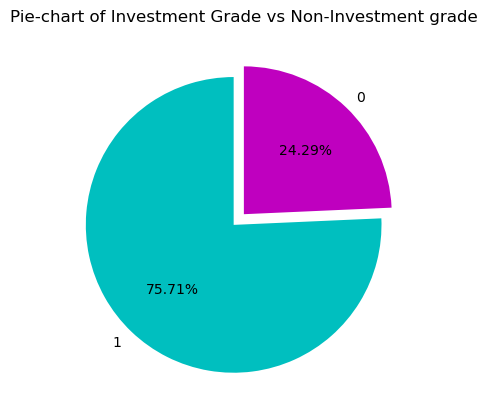

In [11]:
#visualize the price chart
clr=['c','m']
myexplode = [0.1, 0]
plt.title('Pie-chart of Investment Grade vs Non-Investment grade')
plt.pie(myvalues, labels = mylabels, explode = myexplode, startangle = 90, colors= clr, autopct='%.2f%%')
plt.show()
#autopct function returns list of strings used to label the wedge with their numerical values

**Note:** This Pie Chart of Investment Grade shows that the dataset is Imbalanced.So, next process is handling imbalanced dataset with different methods.

## Splitting Train and Test Data

In [12]:
# Independent and Dependent Features
x=df1.drop("InvGrd",axis=1)
y=df1.InvGrd

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [14]:
sns.set_theme(color_codes=True)

### Cross Validation

In [15]:
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 340  341  342 ... 1697 1698 1699] | test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233


## Handling Imbalanced Data

Here, trying to balance the data with under and over sampling methods. 


In [16]:
#class count
Counter(y_train)

Counter({0: 334, 1: 1026})

### 1. Under Sampling

In [17]:
ns=NearMiss(sampling_strategy=0.90)
x_train_ns,y_train_ns=ns.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 1026, 0: 334})
The number of classes after fit Counter({1: 371, 0: 334})


**Note:** This under sampling method reduce the points of the maximum labels, this is not good method because we are removing more data. So , we are using the balanced data.

### 2. Over Sampling
There are many approaches in Over sampling, since it is a binary classification problem, here using two aprroaches, as follows:
 1. *RandomOverSampler* - Random oversampling just increases the size of the training data set through repetition of the original examples. It does not cause any increase in the variety of training examples.
 2. *SMOTE* - Synthetic Minority Over-sampling Technique is not only increases the size of the training data set, it also increases the variety.
Later, will discuss the performance of each model with these two balanced datas which we get by above two methods.

In [18]:
#RandomOverSampler Method
rand=RandomOverSampler(sampling_strategy=0.99)
x_train_rand,y_train_rand=rand.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_rand)))

The number of classes before fit Counter({1: 1026, 0: 334})
The number of classes after fit Counter({1: 1026, 0: 1015})


In [19]:
#SMOTE Method
smote=SMOTE(sampling_strategy='minority')
x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_smote)))

The number of classes before fit Counter({1: 1026, 0: 334})
The number of classes after fit Counter({0: 1026, 1: 1026})


From the above two over sampler methods, both methods performed well. So further we proceed with smote method balanced data since it sampled well while comparing with random sampler method. 

# Investigating performance of ML Techniques

*Here we are investigating the performance of two Machine Learning Procedures such are:* 
* Linear Regression with Ridge and Lasso reularisation
* Logistic regression with Ridge and Lasso reularisation

# Linear Regression

In this part, to compare each  performance of Linear Regression with Lasso and Ridge,  I have evaluated each performance separately as with balanced data, with imbalanced data and done hyperparameter tuning to get best parameters for balanced and imbalanced data. Finally compared the evaluated performance of Linear Regression with Ridge and Lasso, with balanced and imbalanced Data. The outline of the process is given below:

Firstly to select the best parameters, I have done the hyperparameter tuning and with that best parameters , I have evaluated the effective approach. Finally, the outcome of the results showed that linear regression with lasso and ridge are getting similar predictions. 

**Outline:**
1. **Linear Regression**
* With Imbalanced Data
   - Linear Regression without parameters
   - GridSearchCV to find best parametrs
   - Linear Regression with best Parameters
* With Balanced Data
   - Linear Regression without parameters
   - GridSearchCV to find best parameters
   - Linear Regression with best Parameters
2. **Linear Regression with Ridge**
* With Imbalanced Data
   - Ridge without parameters
   - GridSearchCV to find best parametrs
   - Ridge with best Parameters
* with Balanced Data
   - Ridge without parameters
   - GridSearchCV to find best parameters
   - Ridge with best Parameters
3. **Linear Regression with Lasso**
* With Imbalanced Data
   - Lasso without parameters
   - GridSearchCV to find best parametrs
   - Lasso with best Parameters
* with Balanced Data
   - Lasso without parameters
   - GridSearchCV to find best parameters
   - Lasso with best Parameters
4. **Comparision Table of the evaluated Performance**



### With Imbalanced Data

In [20]:
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)
lin_pred = lin_reg.predict(x_test)
lin_pred[lin_pred>=0.5]=1
lin_pred[lin_pred<=0.5]=0


print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred))
r2_LRM = r2_score(lin_pred, y_test)
print("r2 score_LRM :", r2_LRM)
print("------------------------------------------------------")
print(classification_report(y_test, lin_pred))
print(confusion_matrix(y_test, lin_pred))


Mean Squared Error: 0.2235294117647059
r2 score_LRM : -7.674051695199733
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        79
           1       0.78      0.99      0.87       261

    accuracy                           0.78       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.75      0.78      0.70       340

[[  6  73]
 [  3 258]]


GridSearchCV

In [21]:
lin_reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [22]:
#GridSearchCV
params={
    'copy_X' : ['True','False'],
    'fit_intercept' : ['True','False'],
    'n_jobs' : [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'positive' : ['False', 'True'],
    'normalize' :['deprecated','True','False']}

clf=GridSearchCV(estimator= LinearRegression(),param_grid=params,cv=5,n_jobs=5,verbose=1)

clf.fit(x_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': None, 'normalize': 'deprecated', 'positive': 'False'}


Here, the obtained best Parameters of Linear regression are the same as their default parameters.And also after GridSearchCV, we obtained the same score,so proceeding with the obtained Linear Regression score.

### With Balanced Data

In [23]:
# SMOTE
lin_reg_smote= LinearRegression()
lin_reg_smote.fit(x_train_smote, y_train_smote)
lin_pred_smote = lin_reg.predict(x_test)
lin_pred_smote[lin_pred>=0.5]=1
lin_pred_smote[lin_pred<=0.5]=0

print('Mean Squared Error:', metrics.mean_squared_error(y_test, lin_pred_smote))
r2_LRM_smote = r2_score(lin_pred_smote, y_test)
print("r2 score_LRM_smote :", r2_LRM_smote)
print("------------------------------------------------------")
print(classification_report(y_test, lin_pred_smote))
print(confusion_matrix(y_test, lin_pred_smote))

Mean Squared Error: 0.2235294117647059
r2 score_LRM_smote : -7.674051695199733
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        79
           1       0.78      0.99      0.87       261

    accuracy                           0.78       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.75      0.78      0.70       340

[[  6  73]
 [  3 258]]


In [24]:
#GridSearchCV
params={
    'copy_X' : ['True','False'],
    'fit_intercept' : ['True','False'],
    'n_jobs' : [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'positive' : ['False', 'True'],
    'normalize' :['deprecated','True','False']}

clf=GridSearchCV(estimator= LinearRegression(),param_grid=params,cv=5,n_jobs=5,verbose=1)

clf.fit(x_train_smote,y_train_smote)
print(clf.best_params_)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
{'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': None, 'normalize': 'deprecated', 'positive': 'False'}


Here, the obtained best Parameters of Linear regression are the same as their default parameters.And also after GridSearchCV, we obtained the same score,so proceeding with the obtained Linear Regression score.

In [25]:
from sklearn import linear_model
# Obtain the parameters using sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)
print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

Intercept:  0.7906341875652682
Coefficients:  [ 7.31308457e-03 -1.12831981e-01 -3.95655574e-01  3.80722462e-01
 -2.07736586e-02  4.31025166e-02 -3.52138598e-03  1.34153638e-03
  2.00462447e-05  8.12993108e-03  1.46196708e-03 -4.97871985e-02
  1.18011133e-03 -1.05902733e-01 -9.78983309e-04  1.51755162e-03
  8.06168428e-03 -5.42692850e-03  1.60327705e-03 -2.54328805e-04
 -2.77748238e-02  1.31843091e-01  3.39202580e-03 -2.41221989e-04
  1.70549726e-02  2.44576904e-03]


In [26]:
# compute accuracy score
acc_lr = accuracy_score(y_test, lin_pred)
acc_lr_smote = accuracy_score(y_test, lin_pred_smote)


# compute confusion matrix
cnf_lr = confusion_matrix(y_test, lin_pred)
cnf_lr_smote = confusion_matrix(y_test, lin_pred_smote)


# compute recall 
recall_lr = recall_score(y_test, lin_pred)
recall_lr_smote = recall_score(y_test, lin_pred_smote)


# compute precision
precision_lr = precision_score(y_test, lin_pred)
precision_lr_smote = precision_score(y_test, lin_pred_smote)




# table
from tabulate import tabulate
table_data = [['Linear Regression','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['Linear Regression without Balanced Data' , acc_lr, precision_lr, recall_lr, cnf_lr ],
             ['Linear Regression with Balanced Data', acc_lr_smote, precision_lr_smote, recall_lr_smote, cnf_lr_smote],
             ]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒═════════════════════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ Linear Regression                       │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞═════════════════════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ Linear Regression without Balanced Data │   0.776471 │    0.779456 │ 0.988506 │ [[  6  73]         │
│                                         │            │             │          │  [  3 258]]        │
├─────────────────────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Linear Regression with Balanced Data    │   0.776471 │    0.779456 │ 0.988506 │ [[  6  73]         │
│                                         │            │             │          │  [  3 258]]        │
╘═════════════════════════════════════════╧════════════╧═════════════╧══════════╧════════════════════╛


## Ridge

**Outline:**
 * With Imbalanced Data
- Ridge without parameters
- GridSearchCV to find best parametrs
- Ridge with best Parameters
 * with Balanced Data
- Ridge without parameters
- GridSearchCV to find best parameters
- Ridge with best Parameters

### With Imbalanced Data

In [27]:
ridge=linear_model.Ridge()
ridge.fit(x_train, y_train)
ridge_pred_bf = ridge.predict(x_test)
ridge_pred_bf[lin_pred>=0.5]=1
ridge_pred_bf[lin_pred<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred_bf))
r2_ridge_bf = r2_score(ridge_pred_bf, y_test)
print("r2 score_ridge_bf :", r2_ridge_bf)
print("------------------------------------------------------")
print(classification_report(y_test, ridge_pred_bf))
print(confusion_matrix(y_test, ridge_pred_bf))

Mean Squared Error: 0.2235294117647059
r2 score_ridge_bf : -7.674051695199733
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        79
           1       0.78      0.99      0.87       261

    accuracy                           0.78       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.75      0.78      0.70       340

[[  6  73]
 [  3 258]]


In [28]:
ridge.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [29]:
#GridSearchCV
params={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'fit_intercept' : ['True','False'],
    'max_iter' : [100, 500, 1000],
    'normalize' :  ['deprecated','True','False'],
    'positive' : ['False', 'True'],
    'random_state' : [25, 50,75,100, None],
    'tol' : [1e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
    }

ridge_regressor=GridSearchCV(estimator= Ridge(),param_grid=params,scoring='neg_mean_squared_error',cv=5,n_jobs=5,verbose=1)

ridge_regressor.fit(x_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

Fitting 5 folds for each of 28800 candidates, totalling 144000 fits
{'alpha': 100, 'fit_intercept': 'True', 'max_iter': 100, 'normalize': 'deprecated', 'positive': 'False', 'random_state': 25, 'tol': 0.01}
-0.18594731602167036


The above output are the best parameters for imbalanced data, so now I have evaluated Ridge with the best parameters with imbalanced data.

In [30]:
ridge_af=linear_model.Ridge(alpha=100, max_iter=100, random_state=25, tol=0.05)
ridge_af.fit(x_train, y_train)
ridge_pred_af = ridge_af.predict(x_test)
ridge_pred_af[ridge_pred_af>=0.5]=1
ridge_pred_af[ridge_pred_af<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred_af))
r2_ridge_af = r2_score(ridge_pred_af, y_test)
print("r2 score_ridge_bf :", r2_ridge_af)
print("------------------------------------------------------")
print(classification_report(y_test, ridge_pred_af))
print(confusion_matrix(y_test, ridge_pred_af))

Mean Squared Error: 0.22647058823529412
r2 score_ridge_bf : -18.479166666666664
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.04      0.07        79
           1       0.77      1.00      0.87       261

    accuracy                           0.77       340
   macro avg       0.76      0.52      0.47       340
weighted avg       0.77      0.77      0.69       340

[[  3  76]
 [  1 260]]


### With Balanced Data

In [31]:
ridge_smote_bf=linear_model.Ridge()
ridge_smote_bf.fit(x_train_smote, y_train_smote)
ridge_pred_bf_smote = ridge_smote_bf.predict(x_test)
ridge_pred_bf_smote[lin_pred>=0.5]=1
ridge_pred_bf_smote[lin_pred<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred_bf_smote))
r2_ridge_bf_smote = r2_score(ridge_pred_bf_smote, y_test)
print("r2 score_ridge_bf :", r2_ridge_bf_smote)
print("------------------------------------------------------")
print(classification_report(y_test, ridge_pred_bf_smote))
print(confusion_matrix(y_test, ridge_pred_bf_smote))

Mean Squared Error: 0.2235294117647059
r2 score_ridge_bf : -7.674051695199733
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        79
           1       0.78      0.99      0.87       261

    accuracy                           0.78       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.75      0.78      0.70       340

[[  6  73]
 [  3 258]]


In [32]:
#GridSearchCV
params={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'fit_intercept' : ['True','False'],
    'max_iter' : [100, 500, 1000],
    'normalize' :  ['deprecated','True','False'],
    'positive' : ['False', 'True'],
    'random_state' : [25, 50,75,100, None],
    'tol' : [1e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
    }

ridge_regressor_smote=GridSearchCV(estimator= Ridge(),param_grid=params,scoring='neg_mean_squared_error',cv=5,n_jobs=5,verbose=1)

ridge_regressor_smote.fit(x_train_smote,y_train_smote)
print(ridge_regressor_smote.best_params_)
print(ridge_regressor_smote.best_score_)

Fitting 5 folds for each of 28800 candidates, totalling 144000 fits
{'alpha': 100, 'fit_intercept': 'True', 'max_iter': 100, 'normalize': 'deprecated', 'positive': 'False', 'random_state': 25, 'tol': 0.005}
-0.3079864978081861


The above output are the best parameters for balanced data, so now I have evaluated Ridge with the best parameters with balanced data.

In [33]:
ridge_smote_af=linear_model.Ridge(alpha=100, max_iter=100, random_state=25, tol=0.01)
ridge_smote_af.fit(x_train_smote, y_train_smote)
ridge_pred_af_smote = ridge_smote_af.predict(x_test)
ridge_pred_af_smote[lin_pred>=0.5]=1
ridge_pred_af_smote[lin_pred<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ridge_pred_bf_smote))
r2_ridge_af_smote = r2_score(ridge_pred_af_smote, y_test)
print("r2 score_ridge_bf :", r2_ridge_af_smote)
print("------------------------------------------------------")
print(classification_report(y_test, ridge_pred_af_smote))
print(confusion_matrix(y_test, ridge_pred_af_smote))

Mean Squared Error: 0.2235294117647059
r2 score_ridge_bf : -7.674051695199733
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.08      0.14        79
           1       0.78      0.99      0.87       261

    accuracy                           0.78       340
   macro avg       0.72      0.53      0.50       340
weighted avg       0.75      0.78      0.70       340

[[  6  73]
 [  3 258]]


#### Now, comparing the Ridge performance with Balanced and Imbalanced Data.

In [34]:
# compute accuracy score
acc_lr_ridge = accuracy_score(y_test, ridge_pred_af)
acc_lr_ridge_smote = accuracy_score(y_test, ridge_pred_af_smote)


# compute confusion matrix
cnf_lr_ridge = confusion_matrix(y_test, ridge_pred_af)
cnf_lr_ridge_smote = confusion_matrix(y_test, ridge_pred_af_smote)


# compute recall 
recall_lr_ridge = recall_score(y_test, ridge_pred_af)
recall_lr_ridge_smote = recall_score(y_test, ridge_pred_af_smote)


# compute precision
precision_lr_ridge = precision_score(y_test, ridge_pred_af)
precision_lr_ridge_smote = precision_score(y_test, ridge_pred_af_smote)




# table
from tabulate import tabulate
table_data = [['Linear Regression','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['Ridge without Balanced Data' , acc_lr_ridge, precision_lr_ridge, recall_lr_ridge, cnf_lr_ridge ],
             ['Ridge with Balanced Data', acc_lr_ridge_smote, precision_lr_ridge_smote, recall_lr_ridge_smote, cnf_lr_ridge_smote],
             ]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒═════════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ Linear Regression           │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞═════════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ Ridge without Balanced Data │   0.773529 │    0.77381  │ 0.996169 │ [[  3  76]         │
│                             │            │             │          │  [  1 260]]        │
├─────────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Ridge with Balanced Data    │   0.776471 │    0.779456 │ 0.988506 │ [[  6  73]         │
│                             │            │             │          │  [  3 258]]        │
╘═════════════════════════════╧════════════╧═════════════╧══════════╧════════════════════╛


## Lasso Regression

**Outline:**
 * With Imbalanced Data
- Lasso without parameters
- GridSearchCV to find best parametrs
- Lasso with best Parameters
 * with Balanced Data
- Lasso without parameters
- GridSearchCV to find best parameters
- Lasso with best Parameters

## With Imbalanced data

In [35]:
lasso_bf=linear_model.Lasso()
lasso_bf.fit(x_train, y_train)
lasso_pred_bf = lasso_bf.predict(x_test)
lasso_pred_bf[lasso_pred_bf>=0.5]=1
lasso_pred_bf[lasso_pred_bf<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred_bf))
r2_lasso_bf = r2_score(lasso_pred_bf, y_test)
print("r2 score_ridge_bf :", r2_lasso_bf)
print("------------------------------------------------------")
print(classification_report(y_test, lasso_pred_bf))
print(confusion_matrix(y_test, lasso_pred_bf))


Mean Squared Error: 0.2323529411764706
r2 score_ridge_bf : 0.0
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.77      1.00      0.87       261

    accuracy                           0.77       340
   macro avg       0.38      0.50      0.43       340
weighted avg       0.59      0.77      0.67       340

[[  0  79]
 [  0 261]]


In [36]:
lasso_bf.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [37]:
#GridSearchCV
params={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'fit_intercept' : ['True','False'],
    'max_iter' : [100, 500],
    'normalize' :  ['deprecated','True','False'],
    'positive' : ['False', 'True'],
    'random_state' : [25, 50,75,100, None],
    'selection' :['cyclic', 'random'],
    'tol' : [1e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
     'warm_start' : ['True', 'False'],
    }

clf_lasso=GridSearchCV(estimator= Lasso(),param_grid=params,scoring='neg_mean_squared_error',cv=5,n_jobs=5,verbose=1)

clf_lasso.fit(x_train,y_train)
print(clf_lasso.best_params_)
print(clf_lasso.best_score_)

Fitting 5 folds for each of 76800 candidates, totalling 384000 fits
{'alpha': 1, 'fit_intercept': 'True', 'max_iter': 100, 'normalize': 'deprecated', 'positive': 'False', 'random_state': 25, 'selection': 'cyclic', 'tol': 1e-05, 'warm_start': 'True'}
-0.1855343722967128


The above output are the best parameters for imbalanced data, so now I have evaluated Lasso with the best parameters.

In [38]:
lasso_af=linear_model.Lasso(alpha= 1,max_iter= 100, random_state= 25, tol= 1e-05, warm_start= 'True' )
lasso_af.fit(x_train, y_train)
lasso_pred_af = lasso_af.predict(x_test)
lasso_pred_af[lasso_pred_af>=0.5]=1
lasso_pred_af[lasso_pred_af<=0.5]=0

# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred_af))
r2_lasso_af = r2_score(lasso_pred_af, y_test)
print("r2 score_ridge_af :", r2_lasso_af)
print("------------------------------------------------------")
print(classification_report(y_test, lasso_pred_af))
print(confusion_matrix(y_test, lasso_pred_af))

Mean Squared Error: 0.2323529411764706
r2 score_ridge_af : 0.0
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.77      1.00      0.87       261

    accuracy                           0.77       340
   macro avg       0.38      0.50      0.43       340
weighted avg       0.59      0.77      0.67       340

[[  0  79]
 [  0 261]]


## With Balanced Data

In [39]:
lasso_bf_smote=linear_model.Lasso()
lasso_bf_smote.fit(x_train_smote, y_train_smote)
lasso_pred_bf_smote = lasso_bf.predict(x_test)
lasso_pred_bf_smote[lasso_pred_bf>=0.5]=1
lasso_pred_bf_smote[lasso_pred_bf<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred_bf_smote))
r2_lasso_bf_smote = r2_score(lasso_pred_bf_smote, y_test)
print("r2 score_ridge_bf :", r2_lasso_bf_smote)
print("------------------------------------------------------")
print(classification_report(y_test, lasso_pred_bf_smote))
print(confusion_matrix(y_test, lasso_pred_bf_smote))

Mean Squared Error: 0.2323529411764706
r2 score_ridge_bf : 0.0
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.77      1.00      0.87       261

    accuracy                           0.77       340
   macro avg       0.38      0.50      0.43       340
weighted avg       0.59      0.77      0.67       340

[[  0  79]
 [  0 261]]


In [40]:
#GridSearchCV
params={
    'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100],
    'fit_intercept' : ['True','False'],
    'max_iter' : [100, 500],
    'normalize' :  ['deprecated','True','False'],
    'positive' : ['False', 'True'],
    'random_state' : [25, 50,75,100, None],
    'selection' :['cyclic', 'random'],
    'tol' : [1e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1],
     'warm_start' : ['True', 'False'],
    }

clf_lasso=GridSearchCV(estimator= Lasso(),param_grid=params,scoring='neg_mean_squared_error',cv=5,n_jobs=5,verbose=1)

clf_lasso.fit(x_train,y_train)
print(clf_lasso.best_params_)
print(clf_lasso.best_score_)

Fitting 5 folds for each of 76800 candidates, totalling 384000 fits
{'alpha': 1, 'fit_intercept': 'True', 'max_iter': 100, 'normalize': 'deprecated', 'positive': 'False', 'random_state': 25, 'selection': 'cyclic', 'tol': 1e-05, 'warm_start': 'True'}
-0.1855343722967128


The above output are the best parameters for balanced data, so now I have evaluated Lasso with the best parameters.

In [41]:
lasso_af_smote=linear_model.Lasso(alpha = 1, max_iter = 100, random_state = 25, tol= 1e-05, warm_start= True )
lasso_af_smote.fit(x_train_smote, y_train_smote)
lasso_pred_af_smote = lasso_af_smote.predict(x_test)
lasso_pred_af_smote[lasso_pred_af>=0.5]=1
lasso_pred_af_smote[lasso_pred_af<=0.5]=0
 
# Calculating its performance
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lasso_pred_af_smote))
r2_lasso_af_smote = r2_score(lasso_pred_af_smote, y_test)
print("r2 score_ridge_af :", r2_lasso_af_smote)
print("------------------------------------------------------")
print(classification_report(y_test, lasso_pred_af_smote))
print(confusion_matrix(y_test, lasso_pred_af_smote))

Mean Squared Error: 0.2323529411764706
r2 score_ridge_af : 0.0
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.77      1.00      0.87       261

    accuracy                           0.77       340
   macro avg       0.38      0.50      0.43       340
weighted avg       0.59      0.77      0.67       340

[[  0  79]
 [  0 261]]


#### Now, comparing the Lasso performance with Balanced and Imbalanced Data

In [42]:
# compute accuracy score
acc_lr_lasso = accuracy_score(y_test,  lasso_pred_bf)
acc_lr_lasso_smote = accuracy_score(y_test, lasso_pred_af_smote)


# compute confusion matrix
cnf_lr_lasso = confusion_matrix(y_test,  lasso_pred_bf)
cnf_lr_lasso_smote = confusion_matrix(y_test, lasso_pred_af_smote)


# compute recall 
recall_lr_lasso = recall_score(y_test,  lasso_pred_bf)
recall_lr_lasso_smote = recall_score(y_test, lasso_pred_af_smote)


# compute precision
precision_lr_lasso = precision_score(y_test,  lasso_pred_bf)
precision_lr_lasso_smote = precision_score(y_test, lasso_pred_af_smote)




# table
from tabulate import tabulate
table_data = [['Linear Regression','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['Ridge without Balanced Data' , acc_lr_lasso, precision_lr_lasso, recall_lr_lasso, cnf_lr_lasso ],
             ['Ridge with Balanced Data', acc_lr_lasso_smote, precision_lr_lasso_smote, recall_lr_lasso_smote, cnf_lr_lasso_smote],
             ]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒═════════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ Linear Regression           │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞═════════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ Ridge without Balanced Data │   0.767647 │    0.767647 │        1 │ [[  0  79]         │
│                             │            │             │          │  [  0 261]]        │
├─────────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Ridge with Balanced Data    │   0.767647 │    0.767647 │        1 │ [[  0  79]         │
│                             │            │             │          │  [  0 261]]        │
╘═════════════════════════════╧════════════╧═════════════╧══════════╧════════════════════╛


### Comparision Table of the evaluated Performance

In [43]:
from sklearn import linear_model

# L2 regression
l2_regression = linear_model.Ridge(alpha=1e-15)
l2_regression.fit(x_train_smote, y_train_smote)
y2_pred = l2_regression.predict(x_test)

# L1 regression
l1_regression = linear_model.Lasso(alpha=1)
l1_regression.fit(x_train_smote, y_train_smote)
y1_pred = l1_regression.predict(x_test)


# Let's print the weights
print("L2 weights: ", l2_regression.coef_)
print("L1 weights: ", l1_regression.coef_)



L2 weights:  [ 3.57349377e-01 -9.33899857e-02 -7.36017038e-01  8.22289393e-01
 -2.50221379e-02  2.04200045e-01  3.85428998e-03  2.64160167e-03
  8.46727596e-05  8.35200305e-02  2.46483699e-03 -4.04779125e-02
 -1.73242796e-03 -2.01828089e-01 -1.25624571e-01 -2.03152768e-03
  2.55558386e-02 -2.56382693e-02  3.26814347e-03 -5.31551880e-04
 -9.53189547e-02  7.37162145e-02  8.36443379e-03  5.34788884e-04
  2.27376985e-02  1.72179962e-03]
L1 weights:  [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -3.04179757e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00]


In [44]:
# compute accuracy score
acc_lr = accuracy_score(y_test, lin_pred_smote)
acc_ridge = accuracy_score(y_test, ridge_pred_bf_smote)
acc_lasso = accuracy_score(y_test, lasso_pred_af_smote)

# compute confusion matrix
cnf_lr = confusion_matrix(y_test, lin_pred_smote)
cnf_ridge = confusion_matrix(y_test, ridge_pred_bf_smote)
cnf_lasso = confusion_matrix(y_test, lasso_pred_af_smote)

# compute recall 
recall_lr = recall_score(y_test, lin_pred_smote)
recall_ridge = recall_score(y_test,ridge_pred_bf_smote)
recall_lasso = recall_score(y_test, lasso_pred_af_smote)

# compute precision
precision_lr = precision_score(y_test, lin_pred_smote)
precision_ridge = precision_score(y_test,ridge_pred_bf_smote)
precision_lasso = precision_score(y_test,lasso_pred_af_smote)



# table
from tabulate import tabulate
table_data = [['Models','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['Linear Regression' , acc_lr, precision_lr, recall_lr, cnf_lr ],
             ['Linear Regression with Ridge', acc_ridge, precision_ridge, recall_ridge, cnf_lr_ridge],
             ['Linear Regression with Lasso' ,  acc_lasso, precision_lasso, recall_lasso, cnf_lr_lasso]]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒══════════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ Models                       │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞══════════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ Linear Regression            │   0.776471 │    0.779456 │ 0.988506 │ [[  6  73]         │
│                              │            │             │          │  [  3 258]]        │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Linear Regression with Ridge │   0.776471 │    0.779456 │ 0.988506 │ [[  3  76]         │
│                              │            │             │          │  [  1 260]]        │
├──────────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Linear Regression with Lasso │   0.767647 │    0.767647 │ 1        │ [[  0  79]         │
│                              │            │             │          │  [  0 261

**Note:** From the above results, we can see that False Negative prediction is high, i.e., Actual positive cases incorrectly predicted as negative. Even, after applying best parameters also, the linear regression is not performed well, that is clearly seen on the above comparison table that linear regression is not predicting well for this given dataset. 

<AxesSubplot:xlabel='InvGrd', ylabel='Density'>

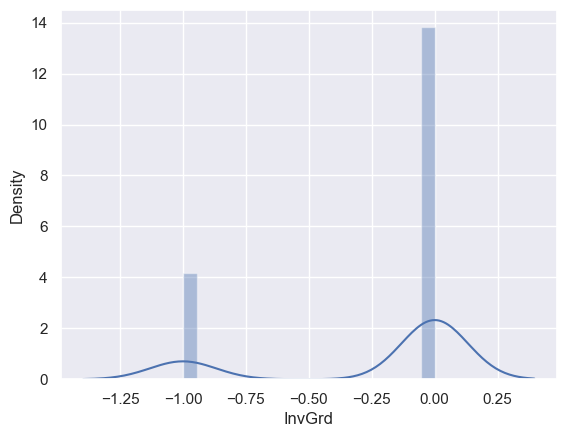

In [45]:
sns.distplot(y_test-lasso_pred_bf)


<AxesSubplot:xlabel='InvGrd', ylabel='Density'>

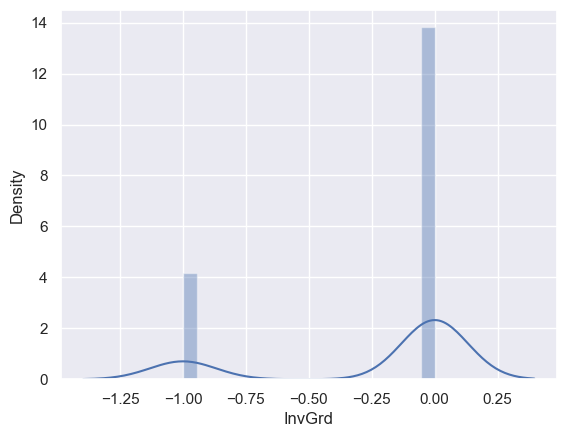

In [46]:
sns.distplot(y_test-lasso_pred_af)

# Logistic Regression with Ridge and Lasso

**Outline:**
* Hyperparameter Tuning
* With Imbalanced Data
* With Balanced Data

### Hyperparameter Tuning

In [47]:
# define parameter grid for Lasso and Ridge logistic regression
lasso_params = {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100]}
ridge_params = {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100]}

# perform grid search cross-validation to find the best hyperparameters for Lasso logistic regression
lasso_grid = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), lasso_params, cv=5, scoring='accuracy')
lasso_grid.fit(x_train, y_train)
print("Best hyperparameters for Lasso logistic regression:", lasso_grid.best_params_)

# perform grid search cross-validation to find the best hyperparameters for Ridge logistic regression
ridge_grid = GridSearchCV(LogisticRegression(solver='saga', max_iter=1000), ridge_params, cv=5, scoring='accuracy')
ridge_grid.fit(x_train, y_train)
print("Best hyperparameters for Ridge logistic regression:", ridge_grid.best_params_)

# evaluate Lasso and Ridge logistic regression models on the testing set
lasso_y_pred = lasso_grid.predict(x_test)
lasso_report = classification_report(y_test, lasso_y_pred)
print("-------------------------------------------------")
print("Lasso logistic regression classification report:\n", lasso_report)
print("-------------------------------------------------")
ridge_y_pred = ridge_grid.predict(x_test)
ridge_report = classification_report(y_test, ridge_y_pred)
print("Ridge logistic regression classification report:\n", ridge_report)

Best hyperparameters for Lasso logistic regression: {'C': 1, 'penalty': 'l1'}
Best hyperparameters for Ridge logistic regression: {'C': 0.01, 'penalty': 'l2'}
-------------------------------------------------
Lasso logistic regression classification report:
               precision    recall  f1-score   support

           0       0.31      0.05      0.09        79
           1       0.77      0.97      0.86       261

    accuracy                           0.75       340
   macro avg       0.54      0.51      0.47       340
weighted avg       0.66      0.75      0.68       340

-------------------------------------------------
Ridge logistic regression classification report:
               precision    recall  f1-score   support

           0       0.31      0.05      0.09        79
           1       0.77      0.97      0.86       261

    accuracy                           0.75       340
   macro avg       0.54      0.51      0.47       340
weighted avg       0.66      0.75      0.6

### With Imbalanced Data

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import numpy as np

log = LogisticRegression()
log.fit(x_train, y_train)

# create and fit the logistic regression model with L1 penalty (Lasso)
lr_lasso = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C = 0.01 )
lr_lasso.fit(x_train, y_train)

# create and fit the logistic regression model with L2 penalty (Ridge)
lr_ridge = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, C = 0.01)
lr_ridge.fit(x_train, y_train)

# make predictions using each model
y_pred_log = log.predict(x_test)
y_pred_lasso = lr_lasso.predict(x_test)
y_pred_ridge = lr_ridge.predict(x_test)

# evaluate the models using accuracy score
acc_log = accuracy_score(y_test, y_pred_log)
acc_lasso = accuracy_score(y_test, y_pred_lasso)
acc_ridge = accuracy_score(y_test, y_pred_ridge)

# compute recall 
recall_log = recall_score(y_test, y_pred_log)
recall_lasso = recall_score(y_test, y_pred_lasso)
recall_ridge = recall_score(y_test, y_pred_ridge)

# compute precision
precision_log = precision_score(y_test, y_pred_log)
precision_lasso = precision_score(y_test, y_pred_lasso)
precision_ridge = precision_score(y_test, y_pred_ridge)


# table
from tabulate import tabulate
table_data = [['models','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['logistic regression' , acc_log, precision_log, recall_log, confusion_matrix(y_test, y_pred_log) ],
             ['Lasso logistic regression', acc_lasso, precision_lasso, recall_lasso, confusion_matrix(y_test, y_pred_lasso)],
             ['Ridge logistic regression' ,  acc_ridge, precision_ridge, recall_ridge, confusion_matrix(y_test, y_pred_ridge)]]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))


╒═══════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ models                    │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞═══════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ logistic regression       │   0.776471 │    0.782875 │ 0.980843 │ [[  8  71]         │
│                           │            │             │          │  [  5 256]]        │
├───────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Lasso logistic regression │   0.761765 │    0.769461 │ 0.984674 │ [[  2  77]         │
│                           │            │             │          │  [  4 257]]        │
├───────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Ridge logistic regression │   0.752941 │    0.770642 │ 0.965517 │ [[  4  75]         │
│                           │            │             │          │  [  9 252]]        │
╘════════════════════

**Note:** From the above results, we can see that False Negative prediction is high, i.e., Actual positive cases incorrectly predicted as negative. Even, after applying best parameters also, the logistic regression performance is clearly seen on the above comparison table that its accuracy, precision , recall is good, eventhough its false negative predictions are little high for imbalanced data.

### With Balanced Data

In [49]:
log_smote = LogisticRegression()
log_smote.fit(x_train_smote, y_train_smote)

# create and fit the logistic regression model with L1 penalty (Lasso)
lr_lasso_smote = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)
lr_lasso_smote.fit(x_train_smote, y_train_smote)

# create and fit the logistic regression model with L2 penalty (Ridge)
lr_ridge_smote = LogisticRegression(penalty='l2', solver='saga', max_iter=1000)
lr_ridge_smote.fit(x_train_smote, y_train_smote)

# make predictions using each model
y_pred_log_smote = log_smote.predict(x_test)
y_pred_lasso_smote = lr_lasso_smote.predict(x_test)
y_pred_ridge_smote = lr_ridge_smote.predict(x_test)

# evaluate the models using accuracy score
acc_log_smote = accuracy_score(y_test, y_pred_log_smote)
acc_lasso_smote = accuracy_score(y_test, y_pred_lasso_smote)
acc_ridge_smote = accuracy_score(y_test, y_pred_ridge_smote)


# compute recall 
recall_log_smote = recall_score(y_test, y_pred_log_smote)
recall_lasso_smote = recall_score(y_test, y_pred_lasso_smote)
recall_ridge_smote = recall_score(y_test, y_pred_ridge_smote)

# compute precision
precision_log_smote = precision_score(y_test, y_pred_log_smote)
precision_lasso_smote = precision_score(y_test, y_pred_lasso_smote)
precision_ridge_smote = precision_score(y_test, y_pred_ridge_smote)


# table
from tabulate import tabulate
table_data = [['models','Accuracy', 'Precision', 'Recall', 'confusion matrix' ],
             ['logistic regression' , acc_log_smote, precision_log_smote, recall_log_smote, confusion_matrix(y_test, y_pred_log_smote) ],
             ['Lasso logistic regression', acc_lasso_smote, precision_lasso_smote, recall_lasso_smote, confusion_matrix(y_test, y_pred_lasso_smote)],
             ['Ridge logistic regression' ,  acc_ridge_smote, precision_ridge_smote, recall_ridge_smote, confusion_matrix(y_test, y_pred_ridge_smote)]]
print(tabulate(table_data, headers= "firstrow", tablefmt="fancy_grid" ))

╒═══════════════════════════╤════════════╤═════════════╤══════════╤════════════════════╕
│ models                    │   Accuracy │   Precision │   Recall │ confusion matrix   │
╞═══════════════════════════╪════════════╪═════════════╪══════════╪════════════════════╡
│ logistic regression       │   0.676471 │    0.821277 │ 0.739464 │ [[ 37  42]         │
│                           │            │             │          │  [ 68 193]]        │
├───────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Lasso logistic regression │   0.6      │    0.834225 │ 0.597701 │ [[ 48  31]         │
│                           │            │             │          │  [105 156]]        │
├───────────────────────────┼────────────┼─────────────┼──────────┼────────────────────┤
│ Ridge logistic regression │   0.6      │    0.834225 │ 0.597701 │ [[ 48  31]         │
│                           │            │             │          │  [105 156]]        │
╘════════════════════

**Note:** From the above results, we can see that False Negative and False positive predictions are little high, i.e., actual positive cases incorrectly predicted as negative and actual negative cases incorrectly predicted as positive. Even, after applying best parameters also, the logistic regression performance is clearly seen on the above comparison table that its accuracy, precision , recall is good, eventhough its false negative and false positive predictions are little high for balanced data.

# Neural Network

In this part, using neural network based approach to classify the firm's rating into one of the rating categories and predicting if it is in an investment grade or not.

In [50]:
# Encode the 'Rating' column using LabelEncoder.
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
label_encoder = LabelEncoder()
df['Rating_encoded'] = label_encoder.fit_transform(df['Rating'])

In [51]:
# Independent and Dependent Features
x=df.drop(["InvGrd","Rating","Rating_encoded"],axis=1)
y_rating=df.Rating_encoded
y_invgrd=df.InvGrd

In [52]:
x.shape

(1700, 26)

In [53]:
df['Rating_encoded']

0        0
1        0
2        0
3        0
4        0
        ..
1695    15
1696    15
1697    15
1698    15
1699    15
Name: Rating_encoded, Length: 1700, dtype: int32

In [54]:
# Convert the encoded 'Rating' column to a categorical variable.
y = np_utils.to_categorical(df['Rating_encoded'])

In [55]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [56]:
# Independent and Dependent Features
x=df.drop(["InvGrd","Rating","Rating_encoded"],axis=1)
y_rating=y
y_invgrd=df['InvGrd']

In [57]:
from sklearn.preprocessing import StandardScaler

# Split the dataset into training and test sets.
X_train, X_test, y_train_rating, y_test_rating, y_train_invgrd, y_test_invgrd = train_test_split(
    x, y_rating, y_invgrd, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Build and train a Neural Networks model.
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_rating, epochs=100, batch_size=32, verbose=0)

In [59]:
# Evaluate the model's performance on the test set.
loss, accuracy = model.evaluate(X_test, y_test_rating)
print(f'Test set accuracy: {accuracy:.2f}')

11/11 [==============================] - 0s 532us/step - loss: 3.2849 - accuracy: 0.3412
Test set accuracy: 0.34


In [60]:
rating_pred=model.predict(X_test)

11/11 [==============================] - 0s 561us/step


In [61]:
rating_pred

array([[1.2827196e-02, 1.8814783e-01, 1.7277913e-02, ..., 2.7361697e-01,
        1.7439595e-01, 3.6917038e-03],
       [8.2738951e-02, 5.7314780e-02, 1.7782886e-02, ..., 4.4091672e-02,
        2.9928818e-01, 3.5097051e-04],
       [5.0341738e-03, 8.5912877e-01, 1.6027838e-02, ..., 2.8857451e-02,
        1.7894531e-02, 2.4954103e-08],
       ...,
       [3.5952933e-02, 6.2620319e-02, 1.0821402e-02, ..., 4.5445567e-01,
        1.3950497e-01, 4.2366830e-04],
       [3.9737038e-02, 3.7501195e-01, 1.7624462e-02, ..., 1.2414044e-01,
        8.0931440e-02, 4.6303154e-05],
       [1.5896799e-01, 5.5049393e-02, 1.5626706e-02, ..., 1.6714887e-01,
        1.4273807e-01, 7.1461991e-06]], dtype=float32)

In [62]:
# Convert the one-hot encoded array to a 1D array of class labels.
y_pred_labels = np.argmax(rating_pred, axis=1)

# Print the resulting array.
print(y_pred_labels)

[13  4  1 13 14 13 13  1  1 10 10  4  1 12 13 14  4 13  4  4 14  0 15 12
 10 13 12 13 12  7 14  4 14 13 13 12  4 14 13 13 14 13 13  8 13 13 14  4
 13 13 14 13 14  4  8 13 13 14 14 14  4 11 14 12 14 13 14  6 10 10 13 11
 10  0  4 14 14 13  7 14 13  1  8 14  7 13  8 13  4 13 12 14 10 14 14 14
  0  4  6 12  3 13 11  4 12 13  0 14  4 10 14 13 13 12 14 12  4 14 13 14
 12 12  4 12 14 13 14  4  0 10  0 13  1  9 13 14 13 12 12 14  4 14 12 10
 13 14 12  4 13 13 13  4 10 14 14 11  7 10  1 10 14 13  4  4  0  1 14 10
  1 13  4  6 14 13 13 13 11  4  1 10 14 11 13  1 14 11 13  4 13 12 11 14
 11 11 14 14 11 13  4 10  4 13  0  4 11 14 10  4  8 13 11  7 12 13 14 10
  4 12  4  1 10 13 14 14  4  1  4  1 13 14  1  6  1 12  4  4  4  1 11  7
 13 14 10 12 11 14  4 10 10 14 13  4 13  4 12  4  4 14 11  1 12 12 11 13
 14  3  4  1 14 14  1  3 13 13 13  1  7  4  6 14  4 12  4  1 10  1  0 13
 14 13 11  4  0  1 12  2 12  4  0 14  8 14  1  1  4 15 10  0 11 13  4 14
 12  0 13 13  4 13  4 13 10 13 12  8  6  4 14  8  1

In [63]:
rating_pred = label_encoder.inverse_transform(y_pred_labels)

# Define the set of investment grade ratings.
investment_grade_ratings = {'Aaa', 'Aa1', 'Aa2', 'Aa3', 'A1', 'A2', 'A3', 'Baa1', 'Baa2', 'Baa3'}

# Predict the investment grade status of each firm based on its predicted rating.
inv_grd_pred = ['Investment Grade' if rating in investment_grade_ratings else 'Non-Investment Grade' for rating in rating_pred]

# Print the predicted investment grade status for the test set.
print(inv_grd_pred)

['Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Non-Investment Grade', 'Non-Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Non-Investment Grade', 'Investment Grade', 'Non-Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Non-Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Non-Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Grade', 'Investment Gra

In [64]:
inv_grd_pred_int = [1 if rating in investment_grade_ratings else 0 for rating in rating_pred]
inv_grd_pred_int

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,


In [65]:
print(classification_report(y_test_invgrd,inv_grd_pred_int))

              precision    recall  f1-score   support

           0       0.49      0.40      0.44        84
           1       0.82      0.86      0.84       256

    accuracy                           0.75       340
   macro avg       0.65      0.63      0.64       340
weighted avg       0.74      0.75      0.74       340



In [66]:
print(confusion_matrix(y_test_invgrd,inv_grd_pred_int))

[[ 34  50]
 [ 35 221]]


**Note:** From the above results, we can see that eventhough we have some False Negative and False positive predictions, i.e., actual positive cases incorrectly predicted as negative and actual negative cases incorrectly predicted as positive, its accuracy, precision , recall and f1 score is good. While comparing to linear regression and logistic regression, neural network approach performs well for this given dataset.

Therefore, we can see that, from the above performance of each model with best parameters, neural networks predictions are well and also we can see that for this datset , eventhough it is imbalanced, it doesn't affect the models performance.